<a href="https://colab.research.google.com/github/vaishu657/Customer-Segmentation-Analysis/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your 'data.csv' file

Saving ecommerce_transactions.csv to ecommerce_transactions.csv


In [ ]:
import pandas as pd

# Load the dataset
df= pd.read_csv('ecommerce_transactions.csv')

# Display the first 5 rows
df.head()

,Transaction_ID,User_Name,Age,Country,Product_Category,Purchase_Amount,Payment_Method,Transaction_Date
0,1,Ava Hall,63,Mexico,Clothing,780.69,Debit Card,2023-04-14
1,2,Sophia Hall,59,India,Beauty,738.56,PayPal,2023-07-30
2,3,Elijah Thompson,26,France,Books,178.34,Credit Card,2023-09-17
3,4,Elijah White,43,Mexico,Sports,401.09,UPI,2023-06-21
4,5,Ava Harris,48,Germany,Beauty,594.83,Net Banking,2024-10-29


In [ ]:
# Check structure and data types
df.info()

# Check for missing values
print(df.isnull().sum())

# Drop rows with missing essential values
df.dropna(subset=['User_Name', 'Purchase_Amount', 'Transaction_ID'], inplace=True)

# Convert Transaction_Date to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Check unique users
print("Unique customers:", df['User_Name'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50000 non-null  int64  
 1   User_Name         50000 non-null  object 
 2   Age               50000 non-null  int64  
 3   Country           50000 non-null  object 
 4   Product_Category  50000 non-null  object 
 5   Purchase_Amount   50000 non-null  float64
 6   Payment_Method    50000 non-null  object 
 7   Transaction_Date  50000 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 3.1+ MB
Transaction_ID      0
User_Name           0
Age                 0
Country             0
Product_Category    0
Purchase_Amount     0
Payment_Method      0
Transaction_Date    0
dtype: int64
Unique customers: 100


In [ ]:
# Frequency of purchases per customer
purchase_freq = df.groupby('User_Name')['Transaction_ID'].count().reset_index()
purchase_freq.columns = ['User_Name', 'Purchase_Frequency']

# Total & average purchase value per customer
purchase_amt = df.groupby('User_Name')['Purchase_Amount'].agg(['sum', 'mean']).reset_index()
purchase_amt.columns = ['User_Name', 'Total_Purchase', 'Average_Purchase']

# Merge all into one customer-level DataFrame
customer_data = pd.merge(purchase_freq, purchase_amt, on='User_Name')

# Summary of key metrics
print(customer_data.describe())

       Purchase_Frequency  Total_Purchase  Average_Purchase
count          100.000000      100.000000        100.000000
mean           500.000000   251579.896500        503.070623
std             22.910895    14061.341775         13.024765
min            435.000000   218420.850000        476.887780
25%            486.750000   242240.720000        492.319581
50%            500.500000   251770.885000        502.493422
75%            514.250000   260333.945000        511.082752
max            568.000000   296354.980000        535.645852


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features
features = customer_data[['Purchase_Frequency', 'Total_Purchase', 'Average_Purchase']]

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Preview
customer_data.head()

,User_Name,Purchase_Frequency,Total_Purchase,Average_Purchase,Cluster
0,Ava Allen,494,247865.13,501.751275,3
1,Ava Anderson,491,246801.09,502.649878,3
2,Ava Clark,517,273776.79,529.548917,2
3,Ava Hall,517,268756.73,519.838936,2
4,Ava Harris,520,266846.08,513.165538,2


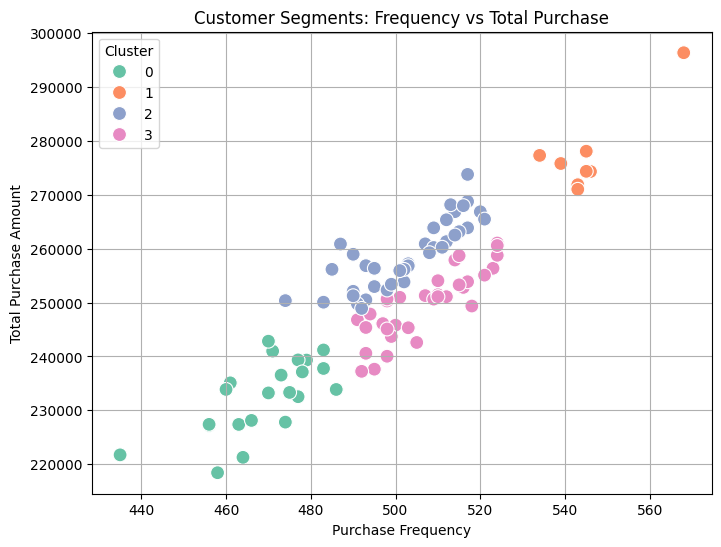

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of segments
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=customer_data,
    x='Purchase_Frequency',
    y='Total_Purchase',
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Customer Segments: Frequency vs Total Purchase')
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Purchase Amount')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


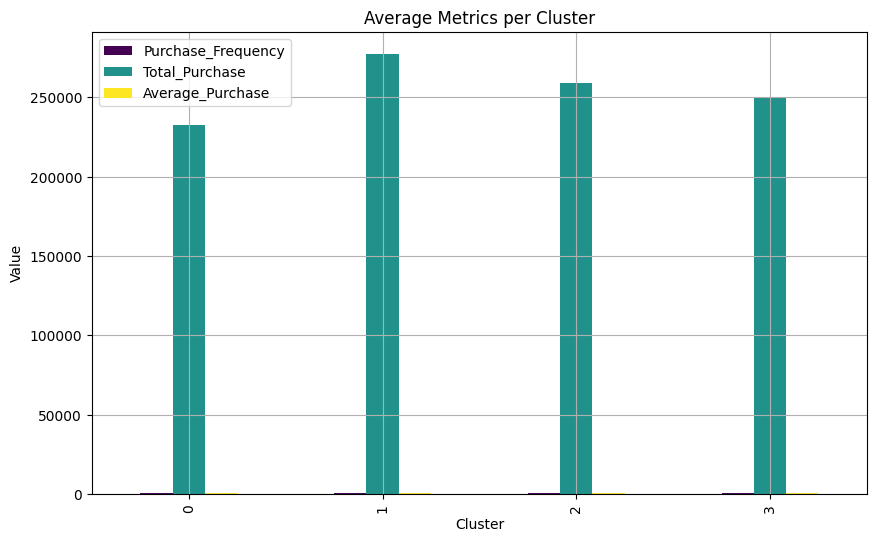

In [ ]:
# Bar plot of average metrics per cluster
cluster_summary = customer_data.groupby('Cluster')[['Purchase_Frequency', 'Total_Purchase', 'Average_Purchase']].mean()
cluster_summary.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Metrics per Cluster')
plt.ylabel('Value')
plt.xlabel('Cluster')
plt.grid(True)
plt.show()

In [ ]:
# Print average behavior by cluster
print("Cluster Summary:")
print(cluster_summary)

# Example insights
for i in cluster_summary.index:
    print(f"\nCluster {i} Insights:")
    freq = cluster_summary.loc[i, 'Purchase_Frequency']
    total = cluster_summary.loc[i, 'Total_Purchase']
    avg = cluster_summary.loc[i, 'Average_Purchase']

    if total > cluster_summary['Total_Purchase'].mean():
        print("High total spenders – target for loyalty programs.")
    elif freq > cluster_summary['Purchase_Frequency'].mean():
        print("Frequent buyers – promote bundles or subscriptions.")
    else:
        print("Low activity – consider re-engagement campaigns.")

Cluster Summary:
         Purchase_Frequency  Total_Purchase  Average_Purchase
Cluster                                                      
0                468.863636   232563.341818        496.080664
1                545.375000   277383.037500        508.565011
2                502.648649   258896.834595        515.107125
3                506.787879   249798.453030        492.903149

Cluster 0 Insights:
Low activity – consider re-engagement campaigns.

Cluster 1 Insights:
High total spenders – target for loyalty programs.

Cluster 2 Insights:
High total spenders – target for loyalty programs.

Cluster 3 Insights:
Frequent buyers – promote bundles or subscriptions.
